# AUDIO CLASSIFICATION USING ANN


Dataset Used :- Urban Sound 8K
Dataset Link :- https://urbansounddataset.weebly.com/download-urbansound8k.html

### 1.EDA(Exploratory Data Analysis)

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename='UrbanSound8K/temp.wav'

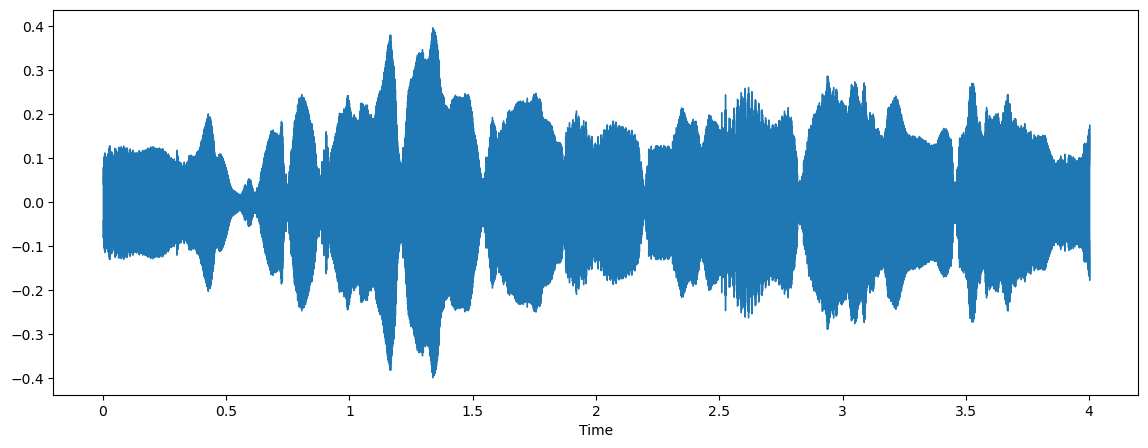

In [3]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [5]:
filename2='UrbanSound8K/temp2.wav'

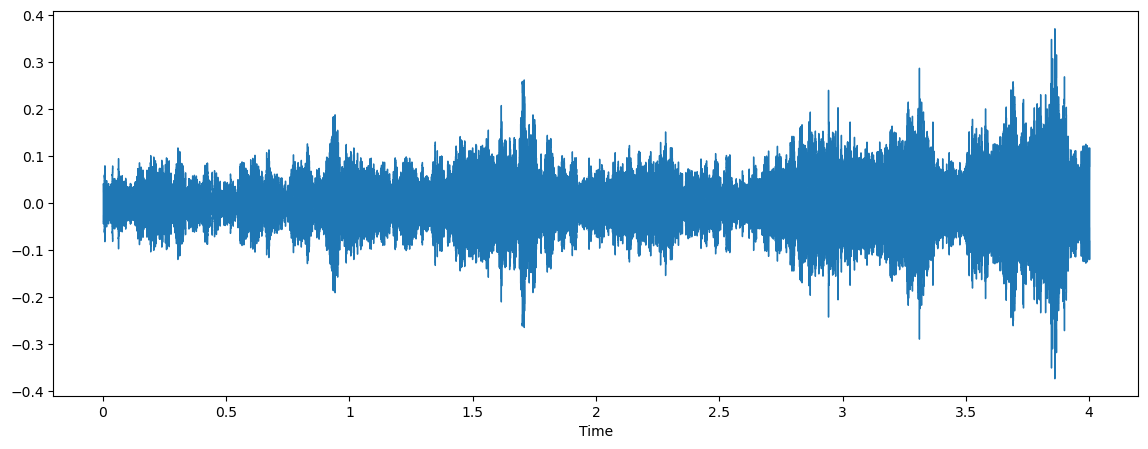

In [6]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename2)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename2)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[  290,  -580],
       [  260,  -640],
       [  163,  -778],
       ...,
       [-5618, -5154],
       [-5710, -5551],
       [-5104, -5270]], dtype=int16)

In [11]:
data

array([ 0.0211792 ,  0.02111816,  0.02296448, ..., -0.04811096,
       -0.02600098, -0.00306702], dtype=float32)

In [12]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

### 2.DATA PREPROCESSING

In [14]:
import librosa
filepath='UrbanSound8K/temp.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(filepath)

In [15]:
print(librosa_audio_data)
print(librosa_sample_rate)

[-0.00309465 -0.00967334 -0.00063775 ... -0.07378128 -0.14118439
 -0.1764641 ]
22050


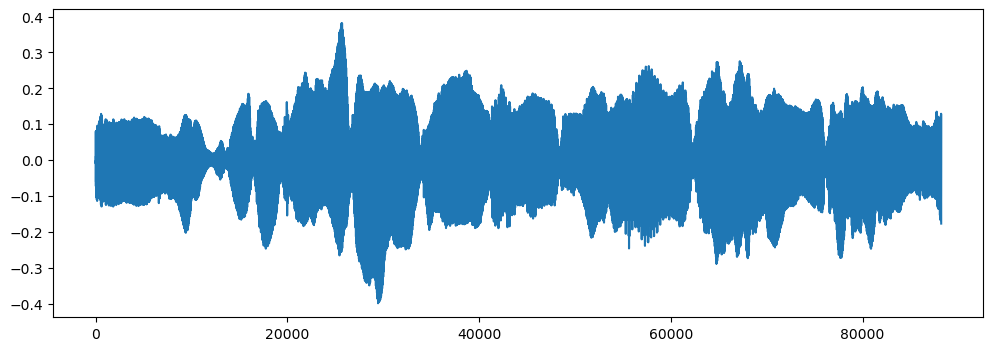

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [17]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filepath)

In [18]:
wave_audio

array([[  290,  -580],
       [  260,  -640],
       [  163,  -778],
       ...,
       [-5618, -5154],
       [-5710, -5551],
       [-5104, -5270]], dtype=int16)

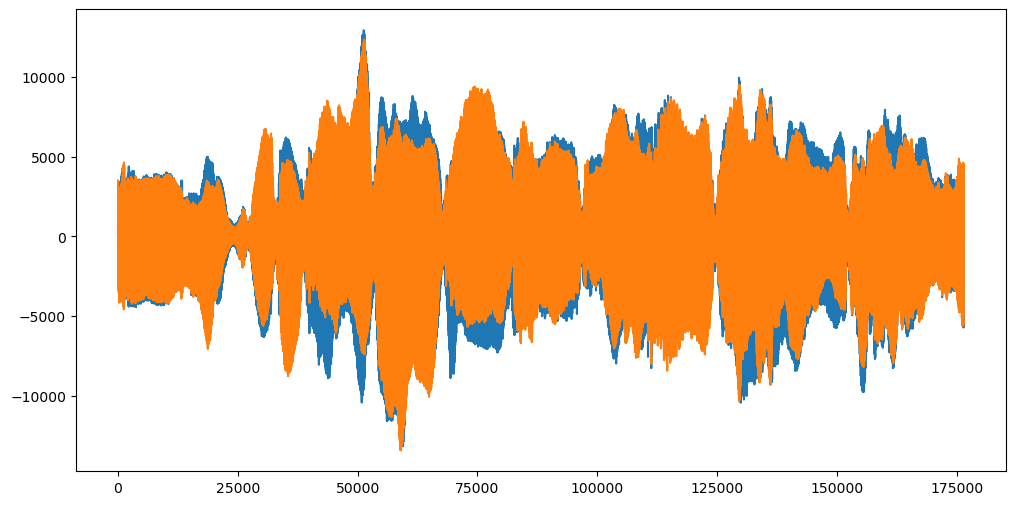

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(wave_audio)

In [20]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [21]:
mfccs

array([[-274.65445  , -278.20468  , -312.85904  , ..., -319.20688  ,
        -259.40524  , -199.95276  ],
       [  96.768875 ,   67.17316  ,   41.95439  , ...,   37.25998  ,
          41.33542  ,   52.40364  ],
       [ -61.88362  ,  -54.76358  ,  -46.9421   , ...,  -57.051964 ,
         -56.23651  ,  -50.676834 ],
       ...,
       [  12.351343 ,    9.072175 ,    3.8325386, ...,    7.8776903,
          11.585193 ,    8.875754 ],
       [ -20.705957 ,  -27.950531 ,  -29.467663 , ...,  -20.012592 ,
         -19.99096  ,  -11.421594 ],
       [   4.0672874,    9.044502 ,   12.725881 , ...,   19.007725 ,
           5.871636 ,   -1.9964852]], dtype=float32)

In [22]:
import pandas as pd
import librosa 
import os
import numpy as np

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [23]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [24]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:01, 11.50it/s]c:\Users\91788\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [07:18, 25.52it/s]c:\Users\91788\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\91788\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:38, 19.05it/s]


In [ ]:
%pip install resampy
%pip install lazy

In [25]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [67]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [77]:
X.shape

(8732, 40)

In [78]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [80]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [81]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [85]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [86]:
X_train.shape

(6985, 40)

In [87]:
X_test.shape

(1747, 40)

In [89]:
y_train.shape

(6985, 10)

In [90]:
y_test.shape

(1747, 10)

### 3.MODEL CREATION

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [91]:
num_labels = y.shape[1]

In [92]:
model=Sequential()
### INPUT LAYER
model.add(Dense(128,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
### SECOND LAYER (HIDDEN LAYER 1)
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
### THIRD LAYER (HIDDEN LAYER 2)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))

### OUTPUT LAYER
model.add(Dense(num_labels))
model.add(Activation('softmax'))

c:\Users\91788\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,458 (283.04 KB)

 Trainable params: 72,458 (283.04 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [95]:
### MODEL TRAINING
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1321 - loss: 12.5180
Epoch 1: val_loss improved from inf to 2.24464, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1322 - loss: 12.3169 - val_accuracy: 0.1351 - val_loss: 2.2446
Epoch 2/100
203/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1604 - loss: 2.3284
Epoch 2: val_loss improved from 2.24464 to 2.09006, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1618 - loss: 2.3249 - val_accuracy: 0.2410 - val_loss: 2.0901
Epoch 3/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2021 - loss: 2.1909
Epoch 3: val_loss improved from 2.09006 to 1.99185, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2024 - loss: 2.1901 - val_accuracy: 0.2559 - val_loss: 1.9918
Epoch 4/100
205/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [100]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8483113646507263
